# Credit Card Fraud Detection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\Navneet Raj\\Documents\\Codsoft Intership project\\creditcard.csv")

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
# Checking the missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Checking the valid and fraud transaction
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
valid = df[df.Class==0]
fraud = df[df.Class==1]

In [8]:
valid.shape

(284315, 31)

In [9]:
fraud.shape

(492, 31)

In [10]:
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
# compare the value for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
# Dividing the dataset into X and Y
X = df.drop(['Class'], axis = 1) 
Y = df["Class"] 

In [14]:
# Split the X and Y into training and testing sets
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 42) 

In [15]:
# Make a Random Forest Model
from sklearn.ensemble import RandomForestClassifier  
rfc = RandomForestClassifier() 
rfc.fit(X_Train, Y_Train)

RandomForestClassifier()

In [16]:
# Prediction
Y_Pred = rfc.predict(X_Test)

In [17]:
# Evaluate the Model
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score

In [18]:
acc = accuracy_score(Y_Test, Y_Pred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(Y_Test, Y_Pred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(Y_Test, Y_Pred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(Y_Test, Y_Pred) 
print("The F1-Score is {}".format(f1)) 

The accuracy is 0.9995786635206876
The precision is 0.9368421052631579
The recall is 0.7876106194690266
The F1-Score is 0.8557692307692308


In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_Train_resampled, Y_Train_resampled = smote.fit_resample(X_Train, Y_Train)

rfc.fit(X_Train_resampled, Y_Train_resampled)
Y_Pred_resampled = rfc.predict(X_Test)
accuracy_resampled = accuracy_score(Y_Test, Y_Pred_resampled)
print('Accuracy after oversampling:', accuracy_resampled)

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_Train_rus, Y_Train_rus = rus.fit_resample(X_Train, Y_Train)

rfc.fit(X_Train_rus, Y_Train_rus)
Y_Pred_rus = rfc.predict(X_Test)
accuracy_rus = accuracy_score(Y_Test, Y_Pred_rus)
print('Accuracy after undersampling:', accuracy_rus)

Accuracy after oversampling: 0.9994382180275835
Accuracy after undersampling: 0.9753096823122946


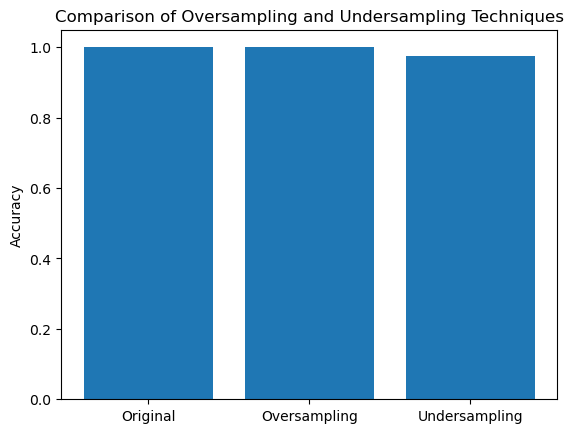

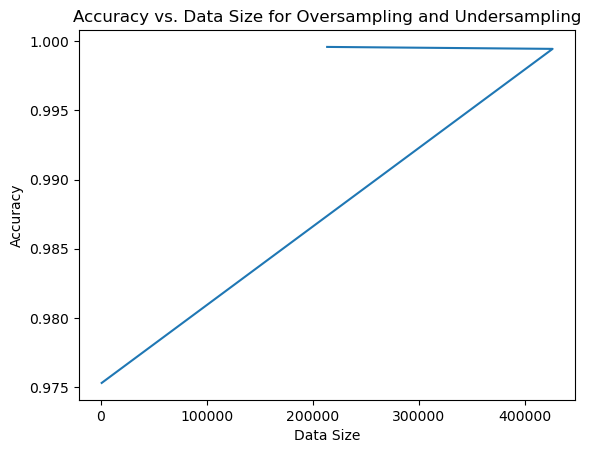

In [22]:
# Create a bar chart to compare the accuracy of the different methods
methods = ['Original', 'Oversampling', 'Undersampling']
accuracies = [acc, accuracy_resampled, accuracy_rus]

plt.bar(methods, accuracies)
plt.ylabel('Accuracy')
plt.title('Comparison of Oversampling and Undersampling Techniques')
plt.show()

# Create a line chart to show the accuracy of the different methods over different data sizes
data_sizes = [len(X_Train), len(X_Train_resampled), len(X_Train_rus)]

plt.plot(data_sizes, accuracies)
plt.xlabel('Data Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Data Size for Oversampling and Undersampling')
plt.show()